In [7]:
import pandas as pd
import numpy as np

In [8]:
path = 'C:/Users/User/VSCodeFiles/Projects/FraudDetection/archive/PS_20174392719_1491204439457_log.csv'
df = pd.read_csv(path)

In [9]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Don't know what step is, going to drop it. Also don't need flagged fraud data as that's what we'll be trying to do so I'll drop that.
Going to Drop name columns as well.

In [10]:
df1 = df.drop(columns=['nameOrig','nameDest','isFlaggedFraud','step'])

In [11]:
df1

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [12]:
unique = pd.unique(df['type'])
unique

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [13]:
df_dummies = pd.get_dummies(df1, columns = ['type'])

In [14]:
df_dummies

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,1,0
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,1,0
2,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0,1
3,181.00,181.00,0.00,21182.00,0.00,1,0,1,0,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0,1,0,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,0,1
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,1,0,0,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,0,1


In [15]:
df_dummies.isna().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
type_CASH_IN      0
type_CASH_OUT     0
type_DEBIT        0
type_PAYMENT      0
type_TRANSFER     0
dtype: int64

In [16]:
df_dummies.value_counts(subset='isFraud')

isFraud
0    6354407
1       8213
dtype: int64

Large disparity, going to downsample to 10,000 non fraud samples

In [17]:
not_fraud = df_dummies[df_dummies['isFraud']==0]
downsample = not_fraud.sample(n=10000)

In [18]:

is_fraud = df_dummies[df_dummies['isFraud'] == 1]
data_train = pd.concat([is_fraud, downsample])

In [19]:
data_train.value_counts(subset='isFraud')

isFraud
0    10000
1     8213
dtype: int64

In [20]:
y = data_train['isFraud']
X = data_train.drop(columns = 'isFraud')

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

Now data is ready for model building, going to use GBoost Classifer and Random Forest Classifier to start

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

params = {
    'n_estimators':[75,100,125,200],
    'criterion':['gini','entropy'],
    'max_depth':[6,12,None],
    'min_samples_split':[2,4],
}

scoring = ['accuracy','f1','recall','precision']

rf = RandomForestClassifier()

rf_cv = GridSearchCV(rf, param_grid=params, cv= 5, scoring=scoring, refit='f1')

In [54]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 12, None],
                         'min_samples_split': [2, 4],
                         'n_estimators': [75, 100, 125, 200]},
             refit='f1', scoring=['accuracy', 'f1', 'recall', 'precision'])

In [55]:
y_pred_rf = rf_cv.predict(X_test)

In [56]:
def print_results(y):
    print('f1:', f1_score(y_test,y))
    print('recall:', recall_score(y_test,y))
    print('accuracy:', accuracy_score(y_test,y))
    print('precision:', precision_score(y_test,y))

In [57]:
print_results(y_pred_rf)

f1: 0.9936305732484075
recall: 0.996956786366403
accuracy: 0.9942355201756794
precision: 0.9903264812575574


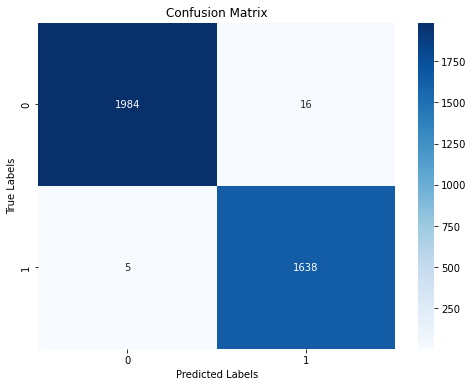

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

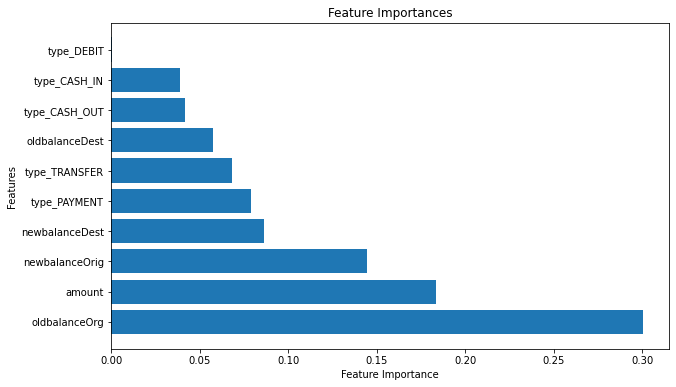

In [59]:
importances = rf_cv.best_estimator_.feature_importances_

feature_names = X.columns

sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_importances, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()






In [60]:
X_test_final = df_dummies.drop(columns='isFraud')
y_test_final = df_dummies.isFraud

In [61]:
y_pred_final = rf_cv.predict(X_test_final)

In [62]:
print(f1_score(y_test_final,y_pred_final))
print(accuracy_score(y_test_final,y_pred_final))
print(recall_score(y_test_final,y_pred_final))
print(precision_score(y_test_final,y_pred_final))

0.19699242706095554
0.9894840490238298
0.9992694508705711
0.10926640926640926


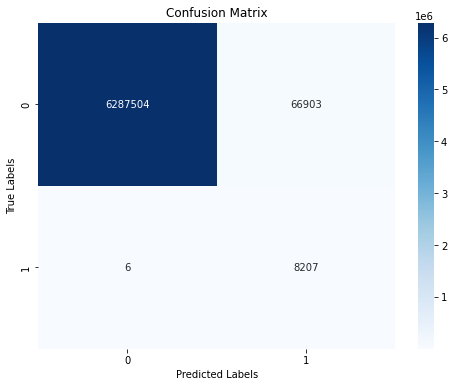

In [63]:
cm = confusion_matrix(y_test_final, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [64]:
import pickle
with open('RandomForest.pkl', 'wb') as file:
    pickle.dump(rf_cv, file)


Strong model, now tyring GBoost Classifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

params_gb = {
    'learning_rate':[0.1,0.3,0.5,0.7],
    'n_estimators':[75,100,150,225],
    'min_samples_split':[2,3],
    'max_depth':[3,5,None]
}

gb = GradientBoostingClassifier()

gb_cv = GridSearchCV(gb, param_grid=params_gb,scoring=scoring, cv=5, refit='f1')

In [66]:
gb_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.7],
                         'max_depth': [3, 5, None], 'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 150, 225]},
             refit='f1', scoring=['accuracy', 'f1', 'recall', 'precision'])

In [68]:
y_pred_gb = gb_cv.predict(X_test)

In [70]:
print(f1_score(y_test,y_pred_gb))
print(accuracy_score(y_test,y_pred_gb))
print(recall_score(y_test,y_pred_gb))
print(precision_score(y_test,y_pred_gb))

0.9939357186173438
0.9945100192149328
0.9975654290931223
0.9903323262839879


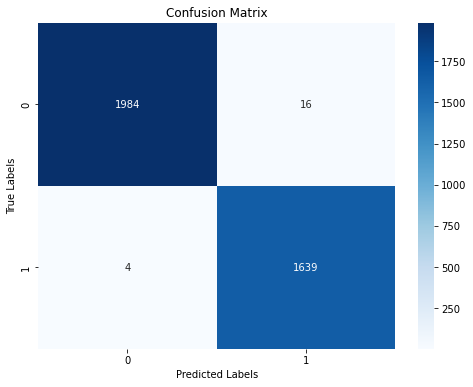

In [71]:
cm = confusion_matrix(y_test, y_pred_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [72]:
y_test_final_gb = gb_cv.predict(X_test_final)

In [73]:
print(f1_score(y_test_final,y_test_final_gb))
print(accuracy_score(y_test_final,y_test_final_gb))
print(recall_score(y_test_final,y_test_final_gb))
print(precision_score(y_test_final,y_test_final_gb))

0.24528640152986522
0.9920605033775395
0.9995129672470474
0.1397966655881201


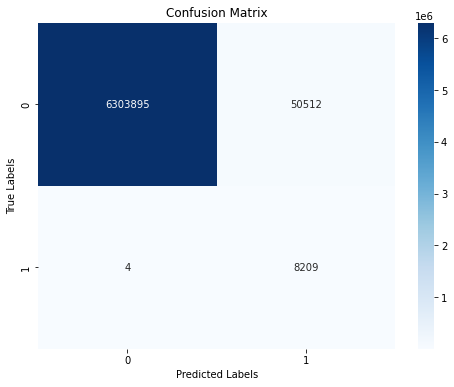

In [74]:
cm = confusion_matrix(y_test_final, y_test_final_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Stronger than Random Forest Classifer

In [75]:
with open('GBClassifer.pkl', 'wb') as file:
    pickle.dump(gb_cv, file)